<a href="https://colab.research.google.com/github/WilliamShengYangHuang/AA_Knowledge_Graph_Research/blob/main/AA_KG_test_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Setup

In [1]:
import os
import sys
import string
import random
import numpy as np
import pandas as pd
import networkx as nx

from matplotlib import pyplot as plt
%matplotlib inline
from IPython import display

from google.colab import drive

In [2]:
# Place the dataset in your Google Drive 
drive.mount("/content/drive")

# set dataset path
folder_name = 'aa_kg_research/test/AA Knowledge Graphs Project.csv' #@param{type:"string"}
path = "/content/drive/My Drive/" + folder_name 

Mounted at /content/drive


## Process portfolio data

In [3]:
# read csv file
df = pd.read_csv(path)
df.head(-1)

,Unnamed: 0,Project title,Key words,Project authors
0,0,The Impact of Green Roofs on Urban Heat Island...,"green roofs,urban heat island effect,urban env...","John Smith, Emily Johnson, Rachel Williams, Mi..."
1,1,Sustainable Urbanism: An Analysis of LEED-Cert...,"sustainable urbanism,LEED certification,neighb...","Jessica Davis, Robert Anderson, William Thomps..."
2,2,The Role of Public Space in Promoting Social C...,"public space,social cohesion,urban design","David Taylor, James Martin, Mary Wilson, Chris..."
3,3,The Future of Transportation: A Case Study of ...,"electric vehicles,autonomous vehicles,urban tr...","Matthew Anderson, Elizabeth Thompson, Richard ..."
4,4,The Relationship Between Urban Form and Walkin...,"urban form,walking behavior,pedestrian environ...","Susan Johnson, Mark Williams, Joseph Thompson,..."
5,5,The Effects of Urban Density on Mental Health,"urban density,mental health,residential design","William Anderson, David Taylor, Jennifer Brown..."
6,6,The Impact of Urban Sprawl on Biodiversity,"urban sprawl,biodiversity,ecological impacts","Robert Smith, Rachel Martin, John Davis, Micha..."
7,7,The Role of Public Art in Urban Revitalization,"public art,urban revitalization,neighborhood i...","Elizabeth Jones, William Thompson, Mark Anders..."
8,8,The Role of Transportation Infrastructure in S...,"transportation infrastructure,urban form,land ...","Christopher Taylor, James Davis, Sarah Wilson,..."
9,9,Evaluating the Effectiveness of Public Transit...,"public transit,transit-oriented development,su...","Matthew Taylor, Susan Brown, John Thompson, Ch..."


In [4]:
# create empty list
split_list = []

# iterate through cells in second column
for cell in df["Project authors"]:    
    split_list.append(cell.split()) # split string in cell and append to list

print(split_list)

[['John', 'Smith,', 'Emily', 'Johnson,', 'Rachel', 'Williams,', 'Michael', 'Brown'], ['Jessica', 'Davis,', 'Robert', 'Anderson,', 'William', 'Thompson,', 'Sarah', 'Jones'], ['David', 'Taylor,', 'James', 'Martin,', 'Mary', 'Wilson,', 'Christopher', 'Taylor'], ['Matthew', 'Anderson,', 'Elizabeth', 'Thompson,', 'Richard', 'Wilson,', 'Christopher', 'Davis'], ['Susan', 'Johnson,', 'Mark', 'Williams,', 'Joseph', 'Thompson,', 'Karen', 'Smith'], ['William', 'Anderson,', 'David', 'Taylor,', 'Jennifer', 'Brown,', 'James', 'Wilson'], ['Robert', 'Smith,', 'Rachel', 'Martin,', 'John', 'Davis,', 'Michael', 'Williams'], ['Elizabeth', 'Jones,', 'William', 'Thompson,', 'Mark', 'Anderson,', 'Mary', 'Johnson'], ['Christopher', 'Taylor,', 'James', 'Davis,', 'Sarah', 'Wilson,', 'David', 'Smith'], ['Matthew', 'Taylor,', 'Susan', 'Brown,', 'John', 'Thompson,', 'Christopher', 'Wilson'], ['Jessica', 'Anderson,', 'Richard', 'Martin,', 'William', 'Jones,', 'Elizabeth', 'Davis'], ['Michael', 'Taylor,', 'John', 'S

## Conditioning

In [ ]:
# To be developed
"""
nodes[]

def add_node():
  nodes.append()

edge_lables[]

def add_edge():
  edge_lables.append()
"""

## Set up knowledge graph

In [5]:
# Create an empty graph
G = nx.Graph()

# Produce fake data #------------------------
# Add some nodes to the graph (test)
people = []
for i in range(32):
    name = "".join(random.choices(string.ascii_uppercase, k=5))
    people.append(name)
    G.add_node(name)

# Add some edges to the graph (test)
for i in range(len(people)):
    for j in range(i+1, len(people)):
        if set(people[i]) & set(people[j]):
            G.add_edge(people[i], people[j])

## Visualise knowledge graph

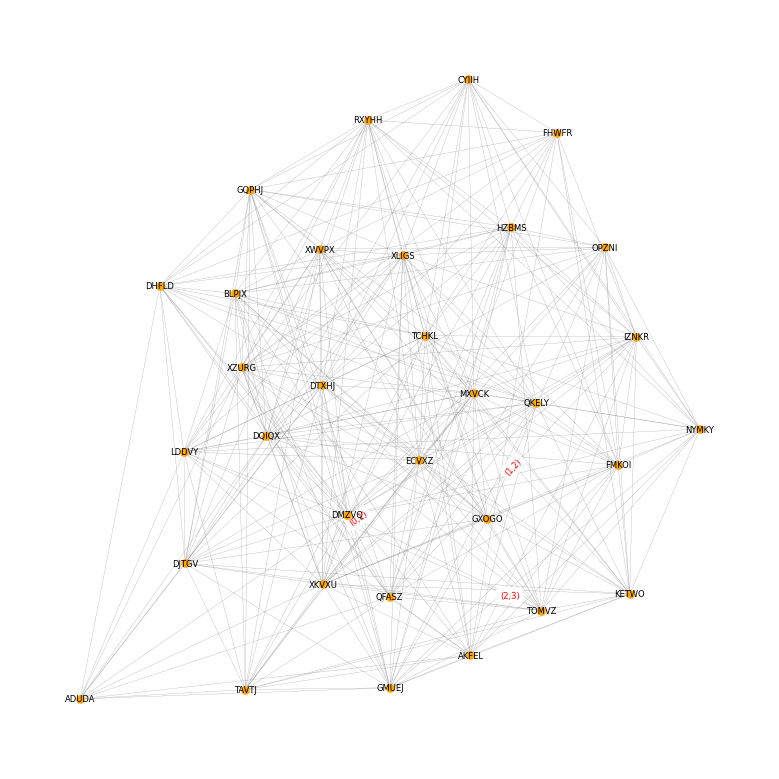

In [12]:
# Visualise the graph
plt.figure(figsize=(5, 5), dpi=150)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_size=4, node_size=10, node_color="orange", width=0.1, edge_color="grey")


# Add edge labels (test)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={(people[0], people[1]): '(0,1)', 
                 (people[1], people[2]): '(1,2)', 
                 (people[2], people[3]): '(2,3)'},
    font_color='red',
    font_size=4
)

plt.show()